In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess the dataset
df = pd.read_csv('/content/station_data_dataverse3.csv')

# Handle missing values
df['distance'] = df['distance'].fillna(df['distance'].mean())

# Encode categorical variables
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'])
df['platform'] = label_encoder.fit_transform(df['platform'])

# Define features and target
features = ['chargeTimeHrs', 'startTime', 'endTime', 'weekday', 'managerVehicle', 'distance',
            'userId', 'stationId', 'locationId']
target = 'kwhTotal'

X = df[features]
y = df[target]

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshape the input for LSTM (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=0)

# Build the LSTM + RNN model
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(512, return_sequences=False))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale predictions and actual values to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - loss: 0.0250 - mae: 0.1076 - val_loss: 0.0161 - val_mae: 0.0812
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - loss: 0.0139 - mae: 0.0762 - val_loss: 0.0157 - val_mae: 0.0818
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - loss: 0.0135 - mae: 0.0762 - val_loss: 0.0151 - val_mae: 0.0820
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0137 - mae: 0.0767 - val_loss: 0.0140 - val_mae: 0.0765
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0124 - mae: 0.0702 - val_loss: 0.0145 - val_mae: 0.0831
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0123 - mae: 0.0709 - val_loss: 0.0132 - val_mae: 0.0725
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0119 - mae: 0.0696 - val_loss: 0.0132 - val_mae: 0.0705
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.0108 - mae: 0.0640 - val_loss: 0.0121 - val_mae: 0.0693
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - lo

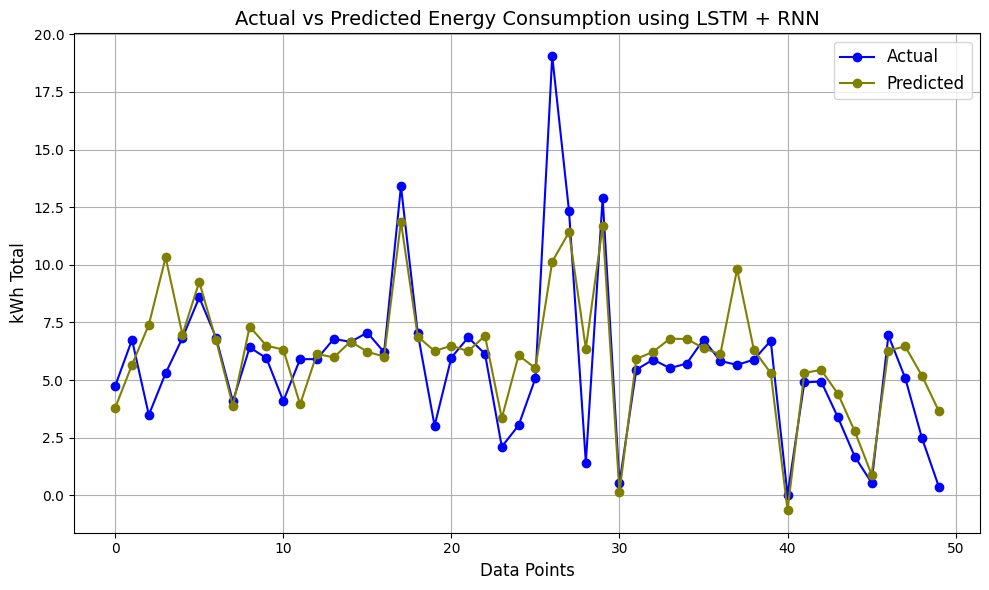

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted on the same graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test_rescaled[:50], label="Actual", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(y_pred_rescaled[:50], label="Predicted", color="olive", marker="o", linestyle="-")

# Add title and labels
plt.title("Actual vs Predicted Energy Consumption using LSTM + RNN", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
print("LSTM+RNN MAE",mean_absolute_error(y_test_rescaled, y_pred_rescaled))

LSTM+RNN MAE 1.2724321736329522
